In [25]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import StandardScaler
from statistics import mean 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [26]:
d = pd.read_csv('processedData.csv')
d.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,class
0,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,0


In [36]:
X = d.iloc[:,:178].values #the indexing includes every column except class 
X[0,0:30]

array([ 135,  190,  229,  223,  192,  125,   55,   -9,  -33,  -38,  -10,
         35,   64,  113,  152,  164,  127,   50,  -47, -121, -138, -125,
       -101,  -50,   11,   39,   24,   48,   64,   46], dtype=int64)

In [37]:
y = d.iloc[:,178].values
y[0:30]

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0], dtype=int64)

In [60]:
X_fft = np.fft.fft(X,axis=1)

In [56]:
X_fft.shape

(11500, 178)

c:\program files\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


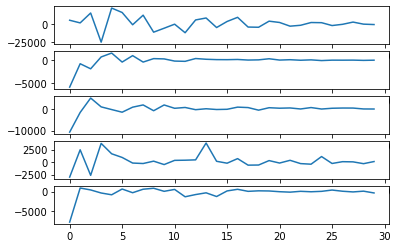

In [57]:
X_fft = X_fft[:,0:30]
plt.subplot(511)
plt.plot(X_fft[1,:])
plt.subplot(512)
plt.plot(X_fft[7,:])
plt.subplot(513)
plt.plot(X_fft[12,:])
plt.subplot(514)
plt.plot(X_fft[0,:])
plt.subplot(515)
plt.plot(X_fft[2,:])

In [58]:
X_train_fft, X_test_fft, y_train_fft, y_test_fft = train_test_split(X_fft, y, test_size = 0.2)
sc = StandardScaler()

In [64]:
def dft(x):
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [ ]:
n

In [66]:
dft(X)

KeyboardInterrupt: 

In [61]:
bruv =  sc.fit_transform(X_fft)

ValueError: Complex data not supported
[[ -3010.            +0.j           2446.79079212  +450.26036407j
   -2657.82926858 -1481.14375235j ...   3723.26645434 +2659.48430797j
   -2657.82926858 +1481.14375235j   2446.79079212  -450.26036407j]
 [  5004.            +0.j           1307.72458087 -7404.53273831j
   15020.76766779 +7130.18903044j ... -25344.16111885-18210.88127508j
   15020.76766779 -7130.18903044j   1307.72458087 +7404.53273831j]
 [ -7840.            +0.j            936.49675216  -664.89349595j
     440.28950635 +2359.5200808j  ...   -347.45932081 -1292.8126898j
     440.28950635 -2359.5200808j     936.49675216  +664.89349595j]
 ...
 [  1202.            +0.j          -1370.81722374 -1786.42314571j
    -406.88133027 -3340.19316663j ...    -40.29865635  +127.31387513j
    -406.88133027 +3340.19316663j  -1370.81722374 +1786.42314571j]
 [ -6914.            +0.j           1291.36233245  +218.99684588j
    2986.66355234 +1355.36334052j ...   4678.64222263 -1123.29490953j
    2986.66355234 -1355.36334052j   1291.36233245  -218.99684588j]
 [  -376.            +0.j            389.45911217  +655.31067299j
    1873.59850321 -2247.98216097j ...   -520.23628273  -554.33190571j
    1873.59850321 +2247.98216097j    389.45911217  -655.31067299j]]


In [59]:
X_train_fft = sc.fit_transform(X_train_fft)
X_test_fft = sc.transform(X_test_fft)

ValueError: Complex data not supported
[[-2859.        +0.00000000e+00j -6434.81607014+4.62812230e+02j
   2363.5748082 -1.41417087e+00j ...   983.51353705-8.87607273e+02j
    477.88804929+1.30327333e+02j  -916.82727975-1.52913369e+03j]
 [ 9943.        +0.00000000e+00j   740.78911201+1.65160419e+03j
   3212.10623935+1.94693166e+03j ...    29.16761919+3.20831407e+02j
   -301.0947446 +1.83757231e+02j   -68.33761584+3.05916622e+02j]
 [ 2736.        +0.00000000e+00j  1134.09903042+9.25481230e+02j
    878.62194119+1.04973532e+03j ...  -150.48170752+1.18875578e+00j
    -26.78685081+1.04801407e+02j  -143.3337056 +1.65983002e+02j]
 ...
 [ 1815.        +0.00000000e+00j   440.63015092-3.93036073e+03j
    585.66871058-7.40237133e+02j ...   -83.98105125-2.01777791e+02j
    363.23610676+1.00028827e+01j    38.99594518-2.67763299e+02j]
 [ 4546.        +0.00000000e+00j   167.92283268-1.25097143e+03j
   -969.64662452-1.23149686e+03j ...   -61.7784939 +1.49578792e+01j
    -43.76983693+2.74759980e+01j    33.09618136+3.19941491e+01j]
 [ 1545.        +0.00000000e+00j -8014.78773871-6.73155303e+03j
  -9078.98655393-2.97302438e+03j ...  -720.08177027-2.03658769e+03j
    875.08045201+2.69563244e+02j   718.39385348-1.00582290e+02j]]


In [128]:
fftX = pd.DataFrame(np.fft.rfft(X,axis=1)) #cast to dataframe so I can conconcatenate later on 

-------------------

In [105]:
#WARNING: MAKING X AND Y SMALLER FOR NOW 
#We'll want to use the full dataset when reporting final numbers
#I'd be nice if we could do 5 fold CV, but that will take a very very long time if we're using the full dataset

X = X.iloc[0:2000,:]
fftX = fftX.iloc[0:2000,:]
y = y.iloc[0:2000]

In [106]:
print(X.shape)
print(fftX.shape)
print(y.shape)

(2000, 178)
(2000, 90)
(2000,)


------------

Using only frequency domain: 

In [107]:
X_train, X_test, y_train, y_test = train_test_split(fftX, y, test_size = 0.2)

In [110]:
#Confirm that only fftX is being used: there should be 90 columns: 
X_train.shape

(1600, 90)

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

ValueError: Complex data not supported
                         0                          1   \
604  -8788.000000+0.000000j  5708.328329+10134.672561j   
1568 -9395.000000+0.000000j   2334.869603-1870.300580j   
480  -1156.000000+0.000000j    -504.991841+635.717354j   
108   5865.000000+0.000000j  -6696.191849+6034.735151j   
1043 -2875.000000+0.000000j   1430.796942-1006.132391j   
...                     ...                        ...   
930  -4671.000000+0.000000j   1254.695202-3708.271958j   
46     855.000000+0.000000j    678.669892+1956.327346j   
790  -5963.000000+0.000000j   -777.201745-1412.382335j   
953   -892.000000+0.000000j     -269.207770+79.801160j   
1072 -5837.000000+0.000000j    1394.538256+377.835486j   

                            2                         3   \
604    2780.998370-314.501393j    -95.232404+974.907993j   
1568   -395.257176-264.087456j    414.587609-396.763690j   
480     184.449789+274.084637j  -469.358628+1785.635773j   
108   4531.612275-7520.019901j -4080.701690-2898.602235j   
1043  1015.351945-1482.910749j   -956.714034+378.087838j   
...                        ...                       ...   
930   -623.302006+1391.651449j     197.895388-79.756171j   
46       13.561687-947.363405j   102.068237+1962.630588j   
790    1226.853222-426.193825j   282.866656+3036.304591j   
953   1414.301915-2535.269245j   578.927892-2683.123205j   
1072    353.443066-445.711642j  -1592.789235-358.178666j   

                            4                         5   \
604      -7.042932+428.575440j   1254.951227+967.647334j   
1568     12.130984-292.276493j   1025.598694+740.955580j   
480    -693.422669-809.701889j      86.445401+23.851638j   
108  -2738.800868+2308.000154j  1443.230794-1032.970257j   
1043  -248.368572-1807.166688j   473.861995-2616.534473j   
...                        ...                       ...   
930    269.440401-1094.541730j   -744.407385+177.529815j   
46     -203.930122+150.435210j     658.196087+74.566679j   
790  -4232.151600-2907.095646j  2744.391406+1380.490455j   
953       594.816322+3.889325j  -1544.372681-172.920940j   
1072   -455.893628-106.655407j   -966.455463-515.638628j   

                           6                         7   \
604   -488.226042+259.083355j  1686.127980+1128.533854j   
1568  -213.630160-171.334438j     1071.887885+4.065549j   
480    277.969932-481.030995j   1052.821576+830.274887j   
108  -263.459838-1571.638580j  -1158.145412+423.828856j   
1043  709.911349-1669.181974j  -1161.120710+927.196686j   
...                       ...                       ...   
930    372.739896-499.815997j   1232.693521+220.169388j   
46      71.827800-446.975428j   -764.468767+731.842634j   
790   -131.195514-239.446678j    462.439438-999.345115j   
953  -816.578516-1002.042296j  -1159.101694+242.366210j   
1072   622.719570+340.621540j   -162.795155-943.489233j   

                           8                        9   ...  \
604    784.057706+832.972955j   758.464779+303.061506j  ...   
1568    122.956167+11.879631j  -197.115015-838.351261j  ...   
480   858.871642+1322.690163j   766.846242+662.284864j  ...   
108    -759.383942-26.361564j  -275.597712+918.851702j  ...   
1043   236.824491-421.034211j  -366.919321-283.223812j  ...   
...                       ...                      ...  ...   
930   -1228.875175+56.022216j  -384.132343-424.631991j  ...   
46     328.136282-929.558758j  -850.672242-665.367028j  ...   
790   -60.741766-2451.677349j  536.281270+1333.531140j  ...   
953  -422.072584-1815.271972j  -780.778204+466.777288j  ...   
1072   -443.244142-19.693921j   187.789151+246.762124j  ...   

                         80                      81                     82  \
604  -307.329255+50.109211j  -271.715524+73.322641j -285.592659+67.176458j   
1568  -28.812135-24.499594j      8.833257+4.592628j   35.002237+12.656265j   
480      6.798574+3.718442j    -7.580777+20.445611j   20.414104+10.904294j   
108    25.374707-39.610004j    45.850375-10.426479j   28.789228-11.162034j   
1043   17.095521+31.561462j  120.693796+128.447383j  38.284763-125.338522j   
...                     ...                     ...                    ...   
930    21.589043-15.436503j    52.086822+10.899734j   56.865256-18.388537j   
46       3.511912-5.773200j   -21.302762-32.550169j   -45.595889-9.864502j   
790    13.104367+18.257214j   -28.838710-23.160326j  -65.457755+86.191976j   
953     78.298689+0.394558j    53.614551-34.330913j   60.227138-16.135897j   
1072   -15.806639+8.149046j    43.574149+16.609876j    19.162287-7.058266j   

                         83                     84                     85  \
604  -267.696435+53.696272j -285.193465+54.175212j -262.606740+47.992359j   
1568    29.024643-5.525798j    -5.419846+0.586436j    1.743553-13.047884j   
480    20.364895-26.337695j    -7.459384+0.943095j    24.210562-6.141698j   
108     5.435982+45.768741j    29.491870-9.761595j   20.338212+18.961825j   
1043  24.344030+133.216239j -157.397915+94.220606j   18.373604-66.492929j   
...                     ...                    ...                    ...   
930     51.825282-7.122598j   33.644640-25.796774j    41.393603-8.701162j   
46     -19.753849-1.322027j  -19.659597-17.395378j    0.894073-12.853528j   
790    -3.383257-26.886866j  -93.887003+34.040693j  -81.888564+60.106864j   
953    90.848273-11.180504j    93.075411+1.865543j    63.863041-7.824432j   
1072    35.581632+4.704350j   50.571061+35.995138j  -16.054746-12.762860j   

                         86                    87                    88  \
604  -261.403229+34.129059j -257.378401+7.666345j -252.139731-2.213865j   
1568   21.090029-22.364289j   11.964410-2.027536j   23.433118-6.635780j   
480     22.170692+5.386839j   14.863870-5.242623j    4.592552+4.699494j   
108    30.940568+23.769582j  32.053833+15.927478j   22.940768+4.697138j   
1043   -27.723875-6.837443j  75.267507+40.259580j -52.278376-95.242595j   
...                     ...                   ...                   ...   
930    18.237049-17.813142j   51.849250+1.342216j   37.319872-6.076890j   
46     -5.588398-22.540657j -15.681470-13.158548j   6.190644-27.341979j   
790   -48.287558+55.305519j  32.742069+13.978292j -86.759819-77.007765j   
953    72.136636-20.084143j   77.668720-8.815140j  98.704081-31.788379j   
1072    3.979175+39.488064j   45.356455-2.883872j  29.376515+12.244953j   

                        89  
604  -230.000000+0.000000j  
1568    9.000000+0.000000j  
480    26.000000+0.000000j  
108    51.000000+0.000000j  
1043  -13.000000+0.000000j  
...                    ...  
930    37.000000+0.000000j  
46     21.000000+0.000000j  
790    -3.000000+0.000000j  
953    92.000000+0.000000j  
1072  -21.000000+0.000000j  

[1600 rows x 90 columns]


In [111]:
##SVM 
from sklearn import svm
modelSVM = svm.SVC(gamma=0.001, C=100.) 
modelSVM.fit(X_train, y_train)
print(classification_report(y_test,modelSVM.predict(X_test)))

ValueError: Complex data not supported
                         0                          1   \
604  -8788.000000+0.000000j  5708.328329+10134.672561j   
1568 -9395.000000+0.000000j   2334.869603-1870.300580j   
480  -1156.000000+0.000000j    -504.991841+635.717354j   
108   5865.000000+0.000000j  -6696.191849+6034.735151j   
1043 -2875.000000+0.000000j   1430.796942-1006.132391j   
...                     ...                        ...   
930  -4671.000000+0.000000j   1254.695202-3708.271958j   
46     855.000000+0.000000j    678.669892+1956.327346j   
790  -5963.000000+0.000000j   -777.201745-1412.382335j   
953   -892.000000+0.000000j     -269.207770+79.801160j   
1072 -5837.000000+0.000000j    1394.538256+377.835486j   

                            2                         3   \
604    2780.998370-314.501393j    -95.232404+974.907993j   
1568   -395.257176-264.087456j    414.587609-396.763690j   
480     184.449789+274.084637j  -469.358628+1785.635773j   
108   4531.612275-7520.019901j -4080.701690-2898.602235j   
1043  1015.351945-1482.910749j   -956.714034+378.087838j   
...                        ...                       ...   
930   -623.302006+1391.651449j     197.895388-79.756171j   
46       13.561687-947.363405j   102.068237+1962.630588j   
790    1226.853222-426.193825j   282.866656+3036.304591j   
953   1414.301915-2535.269245j   578.927892-2683.123205j   
1072    353.443066-445.711642j  -1592.789235-358.178666j   

                            4                         5   \
604      -7.042932+428.575440j   1254.951227+967.647334j   
1568     12.130984-292.276493j   1025.598694+740.955580j   
480    -693.422669-809.701889j      86.445401+23.851638j   
108  -2738.800868+2308.000154j  1443.230794-1032.970257j   
1043  -248.368572-1807.166688j   473.861995-2616.534473j   
...                        ...                       ...   
930    269.440401-1094.541730j   -744.407385+177.529815j   
46     -203.930122+150.435210j     658.196087+74.566679j   
790  -4232.151600-2907.095646j  2744.391406+1380.490455j   
953       594.816322+3.889325j  -1544.372681-172.920940j   
1072   -455.893628-106.655407j   -966.455463-515.638628j   

                           6                         7   \
604   -488.226042+259.083355j  1686.127980+1128.533854j   
1568  -213.630160-171.334438j     1071.887885+4.065549j   
480    277.969932-481.030995j   1052.821576+830.274887j   
108  -263.459838-1571.638580j  -1158.145412+423.828856j   
1043  709.911349-1669.181974j  -1161.120710+927.196686j   
...                       ...                       ...   
930    372.739896-499.815997j   1232.693521+220.169388j   
46      71.827800-446.975428j   -764.468767+731.842634j   
790   -131.195514-239.446678j    462.439438-999.345115j   
953  -816.578516-1002.042296j  -1159.101694+242.366210j   
1072   622.719570+340.621540j   -162.795155-943.489233j   

                           8                        9   ...  \
604    784.057706+832.972955j   758.464779+303.061506j  ...   
1568    122.956167+11.879631j  -197.115015-838.351261j  ...   
480   858.871642+1322.690163j   766.846242+662.284864j  ...   
108    -759.383942-26.361564j  -275.597712+918.851702j  ...   
1043   236.824491-421.034211j  -366.919321-283.223812j  ...   
...                       ...                      ...  ...   
930   -1228.875175+56.022216j  -384.132343-424.631991j  ...   
46     328.136282-929.558758j  -850.672242-665.367028j  ...   
790   -60.741766-2451.677349j  536.281270+1333.531140j  ...   
953  -422.072584-1815.271972j  -780.778204+466.777288j  ...   
1072   -443.244142-19.693921j   187.789151+246.762124j  ...   

                         80                      81                     82  \
604  -307.329255+50.109211j  -271.715524+73.322641j -285.592659+67.176458j   
1568  -28.812135-24.499594j      8.833257+4.592628j   35.002237+12.656265j   
480      6.798574+3.718442j    -7.580777+20.445611j   20.414104+10.904294j   
108    25.374707-39.610004j    45.850375-10.426479j   28.789228-11.162034j   
1043   17.095521+31.561462j  120.693796+128.447383j  38.284763-125.338522j   
...                     ...                     ...                    ...   
930    21.589043-15.436503j    52.086822+10.899734j   56.865256-18.388537j   
46       3.511912-5.773200j   -21.302762-32.550169j   -45.595889-9.864502j   
790    13.104367+18.257214j   -28.838710-23.160326j  -65.457755+86.191976j   
953     78.298689+0.394558j    53.614551-34.330913j   60.227138-16.135897j   
1072   -15.806639+8.149046j    43.574149+16.609876j    19.162287-7.058266j   

                         83                     84                     85  \
604  -267.696435+53.696272j -285.193465+54.175212j -262.606740+47.992359j   
1568    29.024643-5.525798j    -5.419846+0.586436j    1.743553-13.047884j   
480    20.364895-26.337695j    -7.459384+0.943095j    24.210562-6.141698j   
108     5.435982+45.768741j    29.491870-9.761595j   20.338212+18.961825j   
1043  24.344030+133.216239j -157.397915+94.220606j   18.373604-66.492929j   
...                     ...                    ...                    ...   
930     51.825282-7.122598j   33.644640-25.796774j    41.393603-8.701162j   
46     -19.753849-1.322027j  -19.659597-17.395378j    0.894073-12.853528j   
790    -3.383257-26.886866j  -93.887003+34.040693j  -81.888564+60.106864j   
953    90.848273-11.180504j    93.075411+1.865543j    63.863041-7.824432j   
1072    35.581632+4.704350j   50.571061+35.995138j  -16.054746-12.762860j   

                         86                    87                    88  \
604  -261.403229+34.129059j -257.378401+7.666345j -252.139731-2.213865j   
1568   21.090029-22.364289j   11.964410-2.027536j   23.433118-6.635780j   
480     22.170692+5.386839j   14.863870-5.242623j    4.592552+4.699494j   
108    30.940568+23.769582j  32.053833+15.927478j   22.940768+4.697138j   
1043   -27.723875-6.837443j  75.267507+40.259580j -52.278376-95.242595j   
...                     ...                   ...                   ...   
930    18.237049-17.813142j   51.849250+1.342216j   37.319872-6.076890j   
46     -5.588398-22.540657j -15.681470-13.158548j   6.190644-27.341979j   
790   -48.287558+55.305519j  32.742069+13.978292j -86.759819-77.007765j   
953    72.136636-20.084143j   77.668720-8.815140j  98.704081-31.788379j   
1072    3.979175+39.488064j   45.356455-2.883872j  29.376515+12.244953j   

                        89  
604  -230.000000+0.000000j  
1568    9.000000+0.000000j  
480    26.000000+0.000000j  
108    51.000000+0.000000j  
1043  -13.000000+0.000000j  
...                    ...  
930    37.000000+0.000000j  
46     21.000000+0.000000j  
790    -3.000000+0.000000j  
953    92.000000+0.000000j  
1072  -21.000000+0.000000j  

[1600 rows x 90 columns]


In [ ]:
##Logistic regression: 
from sklearn import linear_model
modelLR = linear_model.LogisticRegression(C=1e5, max_iter=1000)    
modelLR.fit(X_train, y_train)
print(classification_report(y_test, modelLR.predict(X_test)))

In [ ]:
##Random forests
from sklearn.ensemble import RandomForestClassifier
modelRF=RandomForestClassifier(n_estimators=1000)   
modelRF.fit(X_train, y_train)
print(classification_report(y_test, modelRF.predict(X_test)))

In [ ]:
##Neural network: 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

In [ ]:
modelNN = MLPClassifier(hidden_layer_sizes=(5,5,5), max_iter=500) 
#3 hidden layers with 13 neurons in each layer 
modelNN.fit(X_train, y_train)
print(classification_report(y_test,modelNN.predict(X_test)))

Using frequency domain and time domain by concatenating matrices:

In [ ]:
X_train_fft, X_test_fft, y_train_fft, y_test_fft = train_test_split(X_fft, y, test_size = 0.2)

sc = StandardScaler()
X_train_fft = sc.fit_transform(X_train_fft)
X_test_fft = sc.transform(X_test_fft)

clf_fft = XGBClassifier()
clf_fft.fit(X_train_fft, y_train_fft)